## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
# 確認尚無GPU，待電腦升級...

'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras
import numpy as np 

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
# 將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間 (平均值正規化(Mean Normalization))

def preproc_x(x, flatten=True):
    x = (x-np.mean(x))/(np.max(x)-np.min(x))
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
# 建立你的神經網路 (mlp疊至6-10層)
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 256, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0803 15:29:01.101141 30396 deprecation_wrapper.py:119] From E:\Users\moon\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0803 15:29:01.129143 30396 deprecation_wrapper.py:119] From E:\Users\moon\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0803 15:29:01.133143 30396 deprecation_wrapper.py:119] From E:\Users\moon\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               33024     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 128)               16512     
__________

In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [9]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0803 15:29:08.633572 30396 deprecation_wrapper.py:119] From E:\Users\moon\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0803 15:29:08.643573 30396 deprecation_wrapper.py:119] From E:\Users\moon\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [10]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0803 15:29:10.832698 30396 deprecation.py:323] From E:\Users\moon\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0803 15:29:11.048710 30396 deprecation_wrapper.py:119] From E:\Users\moon\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 23s 460us/step - loss: 1.6966 - acc: 0.3943 - val_loss: 1.5074 - val_acc: 0.4689
Epoch 2/100
50000/50000 [==============================] - 20s 405us/step - loss: 1.4509 - acc: 0.4884 - val_loss: 1.4160 - val_acc: 0.4981
Epoch 3/100
50000/50000 [==============================] - 20s 407us/step - loss: 1.3301 - acc: 0.5273 - val_loss: 1.3814 - val_acc: 0.5157
Epoch 4/100
50000/50000 [==============================] - 20s 407us/step - loss: 1.2318 - acc: 0.5647 - val_loss: 1.3351 - val_acc: 0.5304
Epoch 5/100
50000/50000 [==============================] - 20s 403us/step - loss: 1.1459 - acc: 0.5957 - val_loss: 1.3658 - val_acc: 0.5292
Epoch 6/100
50000/50000 [==============================] - 20s 410us/step - loss: 1.0718 - acc: 0.6205 - val_loss: 1.3430 - val_acc: 0.5298
Epoch 7/100
50000/50000 [==============================] - 20s 405us/step - loss: 0.9912 - acc: 0.6489 - val_l

50000/50000 [==============================] - 20s 407us/step - loss: 0.0898 - acc: 0.9701 - val_loss: 3.4924 - val_acc: 0.5286
Epoch 59/100
50000/50000 [==============================] - 20s 410us/step - loss: 0.0988 - acc: 0.9676 - val_loss: 3.4539 - val_acc: 0.5240
Epoch 60/100
50000/50000 [==============================] - 21s 411us/step - loss: 0.0845 - acc: 0.9719 - val_loss: 3.5287 - val_acc: 0.5267
Epoch 61/100
50000/50000 [==============================] - 20s 400us/step - loss: 0.0890 - acc: 0.9702 - val_loss: 3.4862 - val_acc: 0.5301
Epoch 62/100
50000/50000 [==============================] - 20s 408us/step - loss: 0.0859 - acc: 0.9713 - val_loss: 3.5746 - val_acc: 0.5385s: 0.0864 - 
Epoch 63/100
50000/50000 [==============================] - 21s 419us/step - loss: 0.0891 - acc: 0.9706 - val_loss: 3.4366 - val_acc: 0.5284
Epoch 64/100
50000/50000 [==============================] - 21s 412us/step - loss: 0.0890 - acc: 0.9707 - val_loss: 3.5970 - val_acc: 0.5284
Epoch 65/100
5

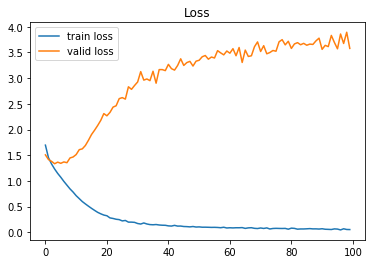

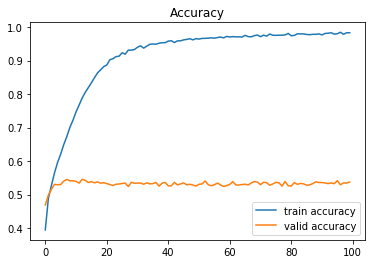

In [12]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()